In [1]:
#파일로드 Normal(정면), lay(눕자세), far(멀리), cat(수염 스티커)
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jC9McJEU_G80OcKlXOWpYyF5qHkdw7LV' -O normal.jpg
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1voxfb_UGsBAEx4qmHRR1_F95LgG7rFFt' -O lay.jpg
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hqsVDj8AliMNGQOJsyqamqvJU0J8f7ko' -O far.jpg
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1siC6exont1wCQYhMQUlI3y8emGMkohtp' -O cat.png

--2026-01-16 04:42:41--  https://docs.google.com/uc?export=download&id=1jC9McJEU_G80OcKlXOWpYyF5qHkdw7LV
Resolving docs.google.com (docs.google.com)... 108.177.125.102, 108.177.125.100, 108.177.125.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jC9McJEU_G80OcKlXOWpYyF5qHkdw7LV&export=download [following]
--2026-01-16 04:42:41--  https://drive.usercontent.google.com/download?id=1jC9McJEU_G80OcKlXOWpYyF5qHkdw7LV&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.8.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1574490 (1.5M) [image/jpeg]
Saving to: ‘normal.jpg’

normal.jpg          100%[===================>]   1.50M  --.-KB/s    in 0.02s   

2026

In [2]:
!mv normal.jpg ~/work/camera_sticker/images
!mv lay.jpg ~/work/camera_sticker/images
!mv far.jpg ~/work/camera_sticker/images
!mv cat.png ~/work/camera_sticker/images

In [79]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

🌫🛸


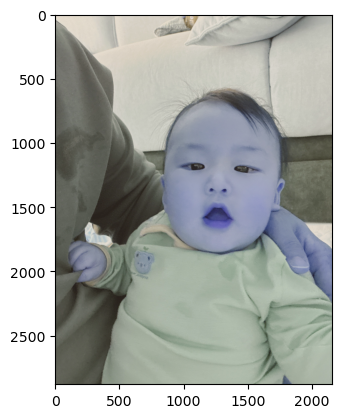

In [113]:
home_dir = os.getenv('HOME')
my_normal_path = os.path.join(home_dir, 'work/camera_sticker/images/normal.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_normal_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

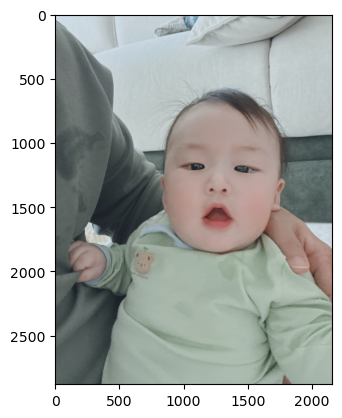

In [114]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [115]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [116]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(869, 958) (1668, 1757)]]


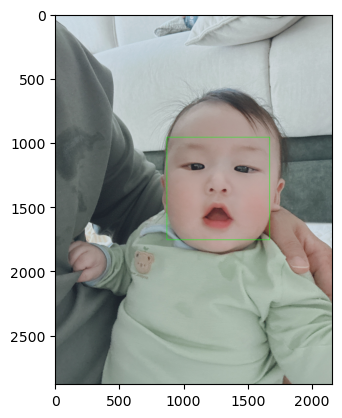

In [117]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [118]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [119]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


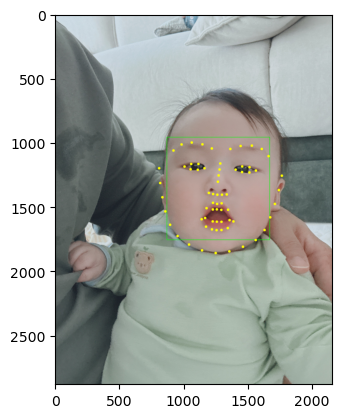

In [120]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [121]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 1. 코의 중심점 좌표 (Landmark 30번)
    x = landmark[30][0]
    y = landmark[30][1]
    
    # 2. 스티커의 크기 설정 (얼굴 영역의 가로 길이를 기준으로 함)
    w = h = dlib_rect.width()
    
    # 3. 스티커가 코 정중앙에 오게 하려면 좌표 보정이 필요함
    # 실제 이미지는 좌측 상단(x, y)을 기준으로 그려지므로, 
    # 중심점에서 가로/세로 길의 절반만큼 왼쪽/위로 이동시켜야 합니다.
    refined_x = x - w // 2
    refined_y = y - h // 2 + 70 # y값을 더해야 스티커가 내려가므로 70 더해줌
    
    print (f'(x,y) : ({refined_x},{refined_y})') # 스티커가 시작될 좌측 상단 좌표
    print (f'(w,h) : ({w},{h})')

(x,y) : (865,975)
(w,h) : (800,800)


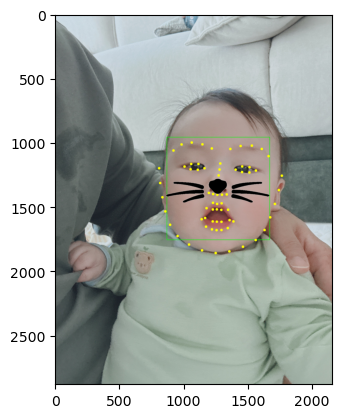

In [122]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat.png') # 파일 경로 확인 필수
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w, h)) # 위에서 구한 w, h로 리사이징

# 합성할 시작 좌표 설정 (음수 방지 처리)
# 이미지 범위를 벗어나면 에러가 나므로 max(0, 값) 처리를 해줍니다.
start_x = max(0, refined_x)
start_y = max(0, refined_y)

# 원본 이미지에서 스티커가 들어갈 영역(ROI) 추출
sticker_area = img_show[start_y:start_y+h, start_x:start_x+w]

# 스티커 합성 (투명한 배경 처리)
# 스티커에서 검은색(0)이 아닌 부분만 원본에 복사합니다.
# 만약 스티커 배경이 흰색이라면 조건을 반대로 주거나 np.where를 사용합니다.
img_show[start_y:start_y+h, start_x:start_x+w] = \
    np.where(img_sticker==255, sticker_area, img_sticker)

# 5. 결과 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

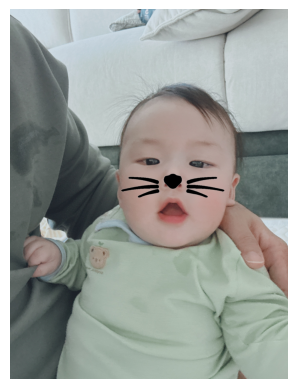

In [123]:
img_show = img_bgr.copy() 

# 스티커 이미지 로드 및 크기 조절
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# 합성할 좌표 설정 (정제된 좌표 사용)
# refined_x, refined_y는 이전 단계에서 구한 좌표값입니다.
start_x = refined_x
start_y = refined_y

# 이미지 경계 예외 처리 (이미지가 화면 밖으로 나가는 것 방지)
if start_x < 0: start_x = 0
if start_y < 0: start_y = 0

# 스티커 합성 (배경 흰색을 투명하게 처리)
# np.where를 사용하여 스티커의 흰색(255) 부분은 원본 배경을 유지하고,
# 흰색이 아닌 부분(수염)만 원본 이미지에 덮어씌웁니다.
sticker_area = img_show[start_y:start_y+h, start_x:start_x+w]
img_show[start_y:start_y+h, start_x:start_x+w] = \
    np.where(img_sticker==255, sticker_area, img_sticker)

# 최종 결과 출력 (RGB 변환 필수)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off') # 격자와 수치 제거
plt.show()

## 문제1. 얼굴 각도에 따라 스티커가 회전하지 않아 스티커 적용이 부자연스러움
## 해결방안 : 얼굴 회전 각에 따른 스티커회전하는 옵션필요

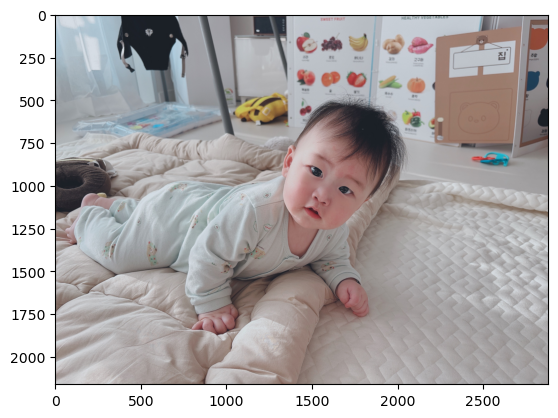

In [125]:
my_lay_path = os.path.join(home_dir, 'work/camera_sticker/images/lay.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
lay_img_bgr = cv2.imread(my_lay_path)    # OpenCV로 이미지를 불러옵니다
lay_img_show = lay_img_bgr.copy()
lay_img_rgb = cv2.cvtColor(lay_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(lay_img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [126]:
dlib_rects = detector_hog(lay_img_rgb, 1)

rectangles[[(1281, 788) (1835, 1343)]]


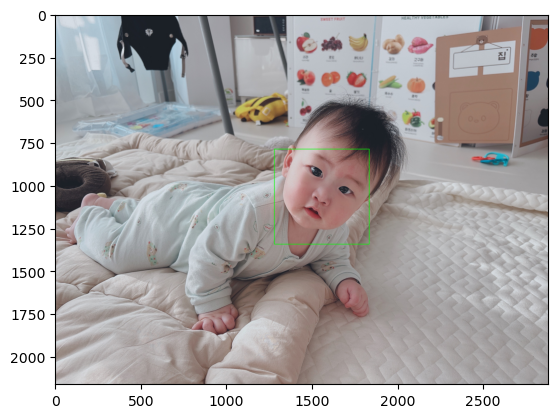

In [127]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(lay_img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

lay_img_show_rgb =  cv2.cvtColor(lay_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(lay_img_show_rgb)
plt.show()

In [128]:
landmark_predictor = dlib.shape_predictor(model_path)

In [129]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(lay_img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


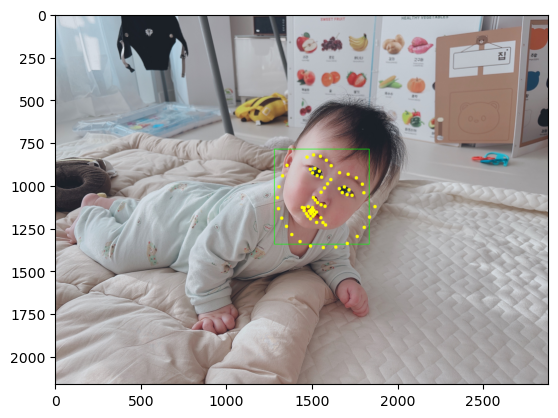

In [130]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(lay_img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

lay_img_show_rgb = cv2.cvtColor(lay_img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(lay_img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [131]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 1. 코의 중심점 좌표 (Landmark 30번)
    x = landmark[30][0]
    y = landmark[30][1]
    
    # 2. 스티커의 크기 설정 (얼굴 영역의 가로 길이를 기준으로 함)
    w = h = dlib_rect.width()
    
    # 3. 스티커가 코 정중앙에 오게 하려면 좌표 보정이 필요함
    # 실제 이미지는 좌측 상단(x, y)을 기준으로 그려지므로, 
    # 중심점에서 가로/세로 길의 절반만큼 왼쪽/위로 이동시켜야 합니다.
    refined_x = x - w // 2
    refined_y = y - h // 2 + 70 # y값을 더해야 스티커가 내려가므로 70 더해줌
    
    print (f'(x,y) : ({refined_x},{refined_y})') # 스티커가 시작될 좌측 상단 좌표
    print (f'(w,h) : ({w},{h})')

(x,y) : (1277,833)
(w,h) : (555,555)


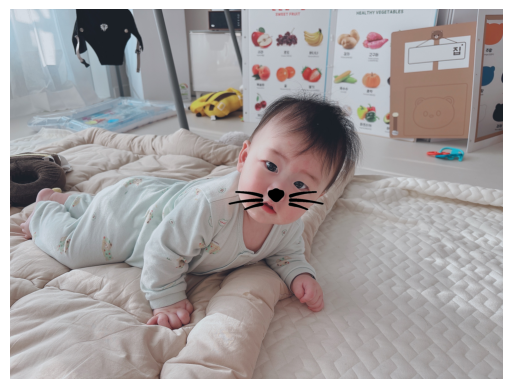

In [132]:
lay_img_show = lay_img_bgr.copy() 

# 스티커 이미지 로드 및 크기 조절
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

# 합성할 좌표 설정 (정제된 좌표 사용)
# refined_x, refined_y는 이전 단계에서 구한 좌표값입니다.
start_x = refined_x
start_y = refined_y

# 이미지 경계 예외 처리 (이미지가 화면 밖으로 나가는 것 방지)
if start_x < 0: start_x = 0
if start_y < 0: start_y = 0

# 스티커 합성 (배경 흰색을 투명하게 처리)
# np.where를 사용하여 스티커의 흰색(255) 부분은 원본 배경을 유지하고,
# 흰색이 아닌 부분(수염)만 원본 이미지에 덮어씌웁니다.
sticker_area = lay_img_show[start_y:start_y+h, start_x:start_x+w]
lay_img_show[start_y:start_y+h, start_x:start_x+w] = \
    np.where(img_sticker==255, sticker_area, img_sticker)

# 최종 결과 출력 (RGB 변환 필수)
plt.imshow(cv2.cvtColor(lay_img_show, cv2.COLOR_BGR2RGB))
plt.axis('off') # 격자와 수치 제거
plt.show()

## 문제2. 멀리서 촬영한 사진에 스티커 적용 부자연스러운 현상 발생
## 해결방안 : dectector에 크기가 사진이 작아져도 알맞게 조절 되는 옵션 필요

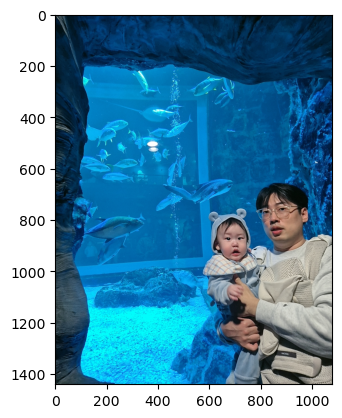

In [133]:
my_far_path = os.path.join(home_dir, 'work/camera_sticker/images/far.jpg') # 본인 이미지가 있는 경로를 가지고 온다.
far_img_bgr = cv2.imread(my_far_path)    # OpenCV로 이미지를 불러옵니다
far_img_show = far_img_bgr.copy()
far_img_rgb = cv2.cvtColor(far_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(far_img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [134]:
dlib_rects = detector_hog(far_img_rgb, 1)

rectangles[[(641, 844) (748, 952)], [(758, 696) (944, 882)]]


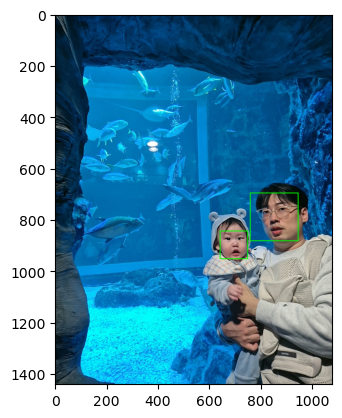

In [135]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(far_img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

far_img_show_rgb =  cv2.cvtColor(far_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(far_img_show_rgb)
plt.show()

In [136]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(far_img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [137]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 1. 코의 중심점 좌표 (Landmark 30번)
    x = landmark[30][0]
    y = landmark[30][1]
    
    # 2. 스티커의 크기 설정 (얼굴 영역의 가로 길이를 기준으로 함)
    w = h = dlib_rect.width()
    
    # 3. 스티커가 코 정중앙에 오게 하려면 좌표 보정이 필요함
    # 실제 이미지는 좌측 상단(x, y)을 기준으로 그려지므로, 
    # 중심점에서 가로/세로 길의 절반만큼 왼쪽/위로 이동시켜야 합니다.
    refined_x = x - w // 2
    refined_y = y - h // 2 + 70 # y값을 더해야 스티커가 내려가므로 70 더해줌
    
    print (f'(x,y) : ({refined_x},{refined_y})') # 스티커가 시작될 좌측 상단 좌표
    print (f'(w,h) : ({w},{h})')

(x,y) : (647,911)
(w,h) : (108,108)
(x,y) : (753,773)
(w,h) : (187,187)


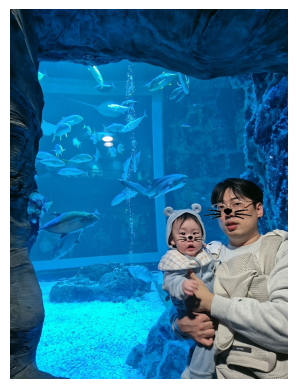

In [138]:
# 원본 이미지 복사 (반복문 밖에서 한 번만 실행)
far_img_show = far_img_bgr.copy() 

# dlib_rects에 담긴 모든 얼굴에 대해 반복
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 1. 각 얼굴별 좌표 및 크기 계산
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    
    # 2. 각 얼굴별 스티커 위치 계산 (미세 조절 필요 시 여기서 수정)
    refined_x = x - w // 2
    refined_y = y - h // 2
    
    # 3. 개별 얼굴에 맞게 스티커 리사이징
    img_sticker_res = cv2.resize(img_sticker, (w, h))

    # 4. 이미지 경계 예외 처리
    start_x = max(0, refined_x)
    start_y = max(0, refined_y)
    
    # 5. 스티커가 이미지 영역을 벗어나는지 최종 체크 (슬라이싱 에러 방지)
    if start_x + w > far_img_show.shape[1] or start_y + h > far_img_show.shape[0]:
        continue # 범위를 벗어나면 해당 얼굴은 건너뜀

    # 6. 각 얼굴 영역에 스티커 합성
    sticker_area = far_img_show[start_y:start_y+h, start_x:start_x+w]
    far_img_show[start_y:start_y+h, start_x:start_x+w] = \
        np.where(img_sticker_res==255, sticker_area, img_sticker_res)

# 모든 얼굴 처리가 끝난 후 최종 출력
plt.imshow(cv2.cvtColor(far_img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()